# Analyse d'une enquête clients Starbucks
**Objectif :** on cherche ici à comprendre les profils et les comportements associés à la fidélité des clients chez Starbucks.



In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    palette="Set2",
    rc={
        "figure.figsize": (6, 3),
        "axes.titlesize": 12,
        "axes.titleweight": "bold",
        "axes.labelsize": 11,
        "axes.spines.top": False,
        "axes.spines.right": False
    }
)


df = pd.read_csv("Starbucks satisfactory survey.csv")

print("Shape:", df.shape)
df.head()

Shape: (122, 21)


,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",122.0,3.663934,0.941343,1.0,3.0,4.0,4.0,5.0
13. How would you rate the price range at Starbucks?,122.0,2.893443,1.081836,1.0,2.0,3.0,4.0,5.0
14. How important are sales and promotions in your purchase decision?,122.0,3.795082,1.090443,1.0,3.0,4.0,5.0,5.0
"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",122.0,3.754098,0.929867,1.0,3.0,4.0,4.0,5.0
16. You rate the WiFi quality at Starbucks as..,122.0,3.254098,0.958317,1.0,3.0,3.0,4.0,5.0
"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",122.0,3.745902,0.828834,1.0,3.0,4.0,4.0,5.0
18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,122.0,3.516393,1.030394,1.0,3.0,4.0,4.0,5.0


## 1. Présentation du dataset
- Taille : 122 réponses, 21 variables
- Données : variables démographiques, comportement d’achat et satisfaction des clients


In [178]:
df.rename(columns={"1. Your Gender": 'Gender',
                                "2. Your Age": "ageGroup",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"annualIncome",
                                "5. How often do you visit Starbucks?":"visitFrequency",
                                "6. How do you usually enjoy Starbucks?":"purchaseMethod",
                                "7. How much time do you normally  spend during your visit?":"timeSpent",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"mostPurchase",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                "12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:": "rate_quality",
                                "13. How would you rate the price range at Starbucks?": "rate_price",
                                "14. How important are sales and promotions in your purchase decision?": "importance_promos",
                                "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)": "rate_ambiance",
                                "16. You rate the WiFi quality at Starbucks as..": "rate_wifi",
                                "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)": "rate_service",
                                "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?": "rate_hangout",
                                "20. Will you continue buying at Starbucks?": "loyalty",},inplace=True)

In [179]:
df.columns

Index(['Timestamp', 'Gender', 'ageGroup', 'status', 'annualIncome',
       'visitFrequency', 'purchaseMethod', 'timeSpent', 'location',
       'membership', 'mostPurchase', 'moneySpend', 'rate_quality',
       'rate_price', 'importance_promos', 'rate_ambiance', 'rate_wifi',
       'rate_service', 'rate_hangout',
       '19. How do you come to hear of promotions at Starbucks? Check all that apply.',
       'loyalty'],
      dtype='object')

In [180]:
for col in ["purchaseMethod", "visitFrequency", "timeSpent", "moneySpend", "ageGroup", "annualIncome", "status", "Gender"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

df["purchaseMethod"] = df["purchaseMethod"].str.lower()

mapping_method = {
    "dine in": "Dine in",
    "take away": "Take away",
    "drive-thru": "Drive-thru",
    "drive thru": "Drive-thru",
    "never": "Never",
    "never buy": "Never",
    "i dont like coffee": "Other",
    "i don't like coffee": "Other",
}

df["purchaseMethod"] = df["purchaseMethod"].replace(mapping_method)
df["purchaseMethod"] = df["purchaseMethod"].where(
    df["purchaseMethod"].isin(["Dine in", "Take away", "Drive-thru", "Never"]),
    "Other"
)

df["purchaseMethod"].value_counts()


purchaseMethod
Take away     49
Dine in       46
Drive-thru    20
Never          5
Other          2
Name: count, dtype: int64

## 4. Profil des répondants (analyse univariée)
Nous allons maintenant chercher à décrire le profil des clients et pour cela on doit explorer chaque variable séparément. On va notamment observer la répartition par genre, âge, statut, niveau de revenu, etc...
Cela va nous permettre de comprendre à quoi ressemble l’échantillon de clients et quelles sont les tendances générales de consommation.

### Genre

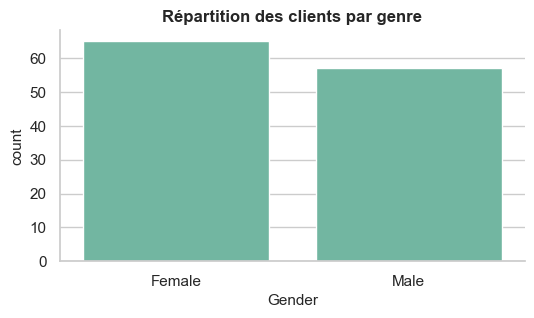

Gender
Female    53.278689
Male      46.721311
Name: proportion, dtype: float64

In [181]:
sns.countplot(x="Gender", data=df)
plt.title("Répartition des clients par genre")
plt.show()

df["Gender"].value_counts(normalize=True) * 100

### Groupe d'âge 

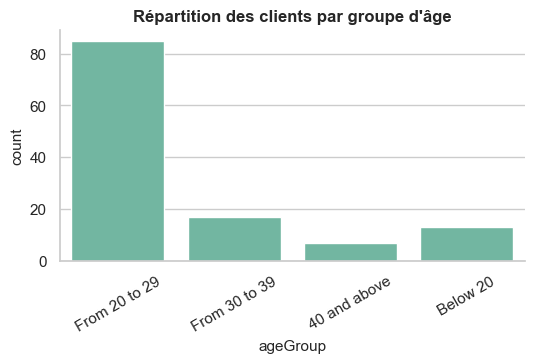

In [182]:
sns.countplot(x="ageGroup", data=df)
plt.title("Répartition des clients par groupe d'âge")
plt.xticks(rotation=30)
plt.show()

### Statut professionnel

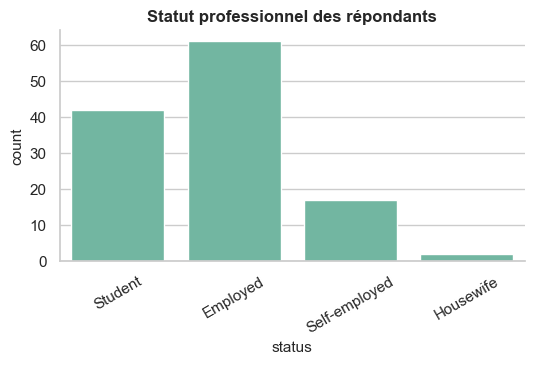

In [183]:
sns.countplot(x="status", data=df)
plt.title("Statut professionnel des répondants")
plt.xticks(rotation=30)
plt.show()


### Revenu 

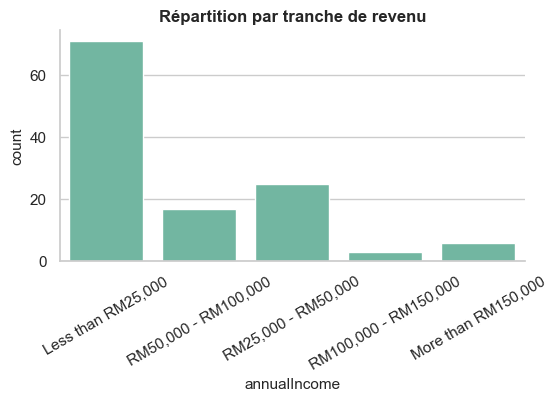

In [184]:
sns.countplot(x="annualIncome", data=df)
plt.title("Répartition par tranche de revenu")
plt.xticks(rotation=30)
plt.show()


### Fréquence de visite

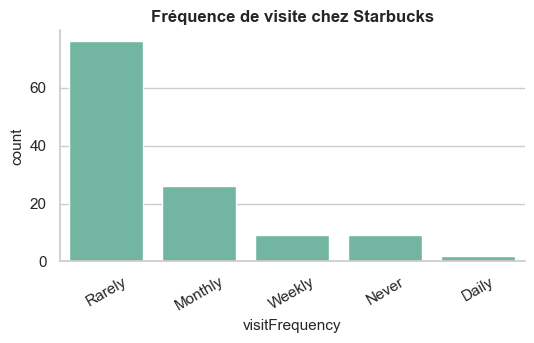

In [185]:
sns.countplot(x="visitFrequency", data=df)
plt.title("Fréquence de visite chez Starbucks")
plt.xticks(rotation=30)
plt.show()

### Méthode de consommation

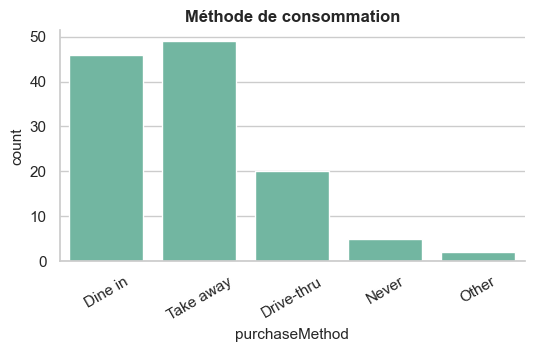

In [186]:
sns.countplot(x="purchaseMethod", data=df)
plt.title("Méthode de consommation")
plt.xticks(rotation=30)
plt.show()

### Temps passé

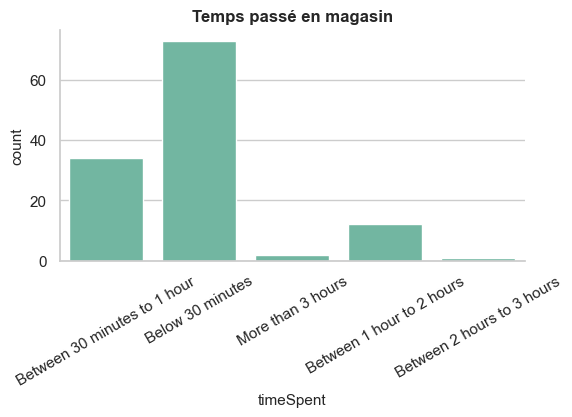

In [187]:
sns.countplot(x="timeSpent", data=df)
plt.title("Temps passé en magasin")
plt.xticks(rotation=30)
plt.show()


### Dépense moyenne par visite

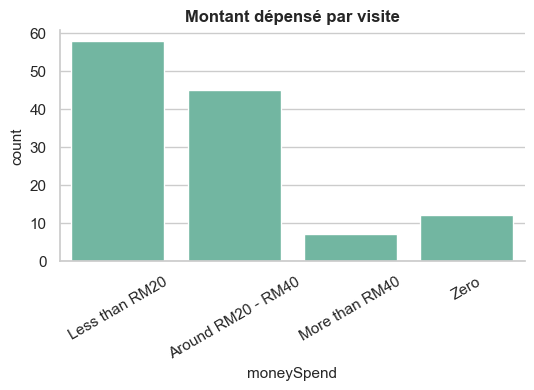

In [188]:
sns.countplot(x="moneySpend", data=df)
plt.title("Montant dépensé par visite")
plt.xticks(rotation=30)
plt.show()

Les observations que l'on peut en tirer :

- L’échantillon a majoritairement entre 20–29 ans.

- Les clients sont surtout employés et étudiants.

- La fréquence de visite est plutôt rare / mensuelle, on observe peu de visites hebdomadaires ou quotidiennes.

- La majorité passe moins d’une heure et dépense moins de RM40 par visite.

## 5. Analyse de la fidélité 
Dans cette partie, nous allons comparer les clients qui ont déclaré vouloir continuer à acheter Starbucks à ceux qui ne souhaitent plus ou pas.  
Pour cela, nous allons nous baser notre comparaison sur les différences de profil, de comportement et de perception afin de dégager des leviers potentiels de rétention de la clientèle.

In [189]:
df["loyalty"].value_counts(dropna=False)


loyalty
Yes    94
No     28
Name: count, dtype: int64

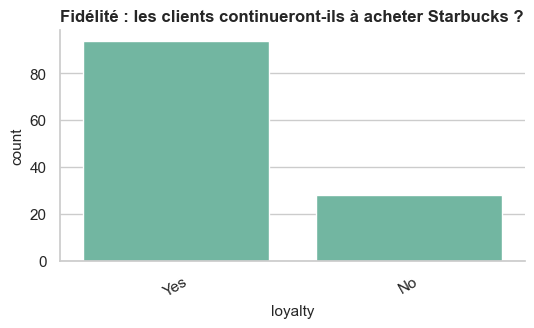

In [190]:
sns.countplot(x="loyalty", data=df)
plt.title("Fidélité : les clients continueront-ils à acheter Starbucks ?")
plt.xticks(rotation=30)
plt.show()

**Observation :** la majorité des clients déclare vouloir continuer à acheter Starbucks. On doit donc identifier ce qui pousse majoritairement ces clients à vouloir continuer à consommer chez eux. Or, il reste quand même un groupe non négligeable de clients qui ont répondu “No” et qu'on doit chercher à comprendre.


In [191]:
def loyalty_rate_plot(df, col, title, positive="Yes", rotate=0, min_n=5):
    tmp = df[[col, "loyalty"]].dropna()

    # Comptes et taux
    grp = tmp.groupby(col).agg(
        n=("loyalty", "size"),
        loyalty_rate=("loyalty", lambda x: (x == positive).mean())
    ).reset_index()

    # Filtrer petits groupes
    grp = grp[grp["n"] >= min_n].sort_values("loyalty_rate", ascending=False)

    plt.figure(figsize=(8, 3.8))
    ax = sns.barplot(data=grp, x=col, y="loyalty_rate")
    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Taux de fidélité (Yes)")
    plt.xticks(rotation=rotate, ha="right" if rotate else "center")

    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    display(grp)


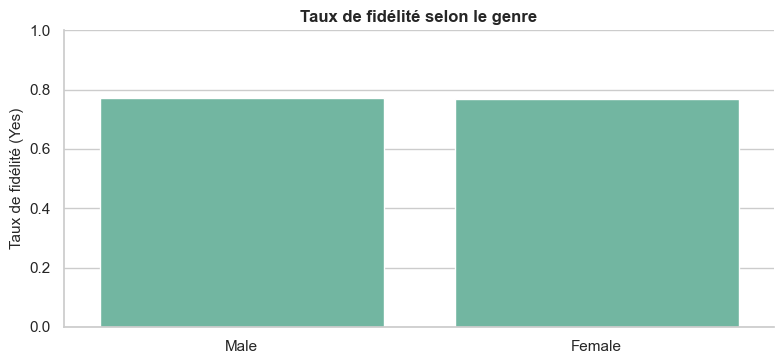

,Gender,n,loyalty_rate
1,Male,57,0.771930
0,Female,65,0.769231


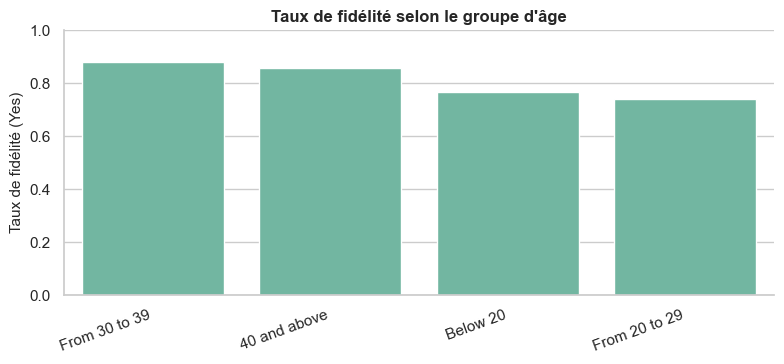

,ageGroup,n,loyalty_rate
3,From 30 to 39,17,0.882353
0,40 and above,7,0.857143
1,Below 20,13,0.769231
2,From 20 to 29,85,0.741176


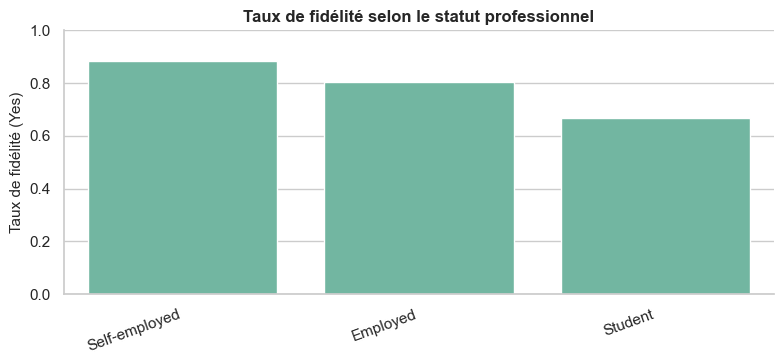

,status,n,loyalty_rate
2,Self-employed,17,0.882353
0,Employed,61,0.803279
3,Student,42,0.666667


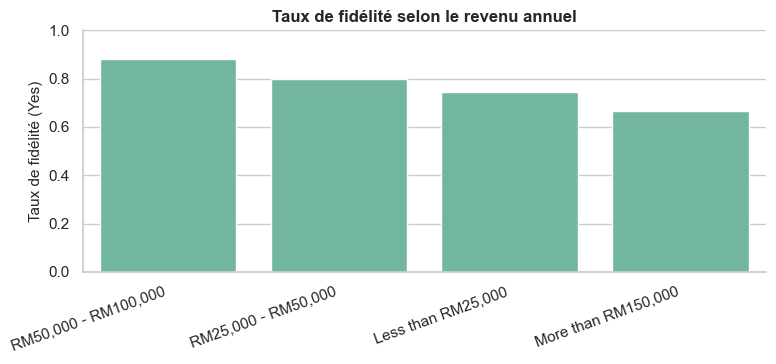

,annualIncome,n,loyalty_rate
4,"RM50,000 - RM100,000",17,0.882353
3,"RM25,000 - RM50,000",25,0.800000
0,"Less than RM25,000",71,0.746479
1,"More than RM150,000",6,0.666667


In [192]:
loyalty_rate_plot(df, "Gender", "Taux de fidélité selon le genre")
loyalty_rate_plot(df, "ageGroup", "Taux de fidélité selon le groupe d'âge", rotate=20)
loyalty_rate_plot(df, "status", "Taux de fidélité selon le statut professionnel", rotate=20)
loyalty_rate_plot(df, "annualIncome", "Taux de fidélité selon le revenu annuel", rotate=20)


**Observations :** 
- Le taux de fidélité est très proche entre hommes et femmes (environ 77% dans les deux cas) donc le genre ne semble pas être un facteur discriminant majeur de fidélité.
- Les 30–39 ans et les plus de 40 ans affichent un taux de fidélité plus élevé que les 20–29 ans, l’âge pourrait donc jouer un rôle, mais la différence semble surtout marquée par la forte présence des 20–29 dans l’échantillon.
- Les étudiants ont un taux de fidélité plus faible que les employés et indépendants, cela peut refléter une sensibilité plus forte au prix chez les étudiants ou une fréquence de visite plus irrégulière.
- Les tranches de revenu intermédiaires présentent un taux de fidélité plus élevé, car en effet le revenu peut influencer la fidélité via la perception de la valeur/prix.

A noter que les effectifs dans certaines tranches sont faibles, donc les comparaisons doivent rester indicatives.  


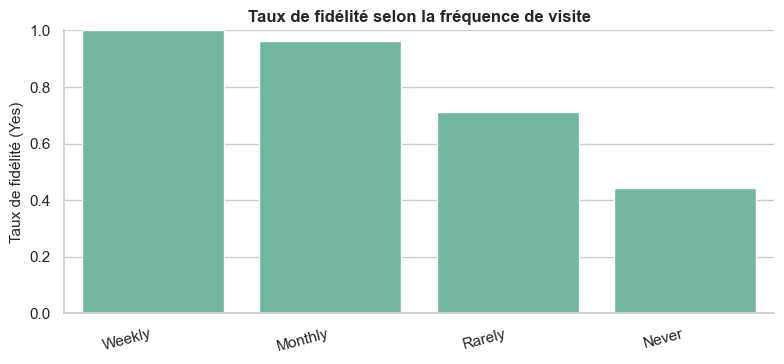

,visitFrequency,n,loyalty_rate
4,Weekly,9,1.000000
1,Monthly,26,0.961538
3,Rarely,76,0.710526
2,Never,9,0.444444


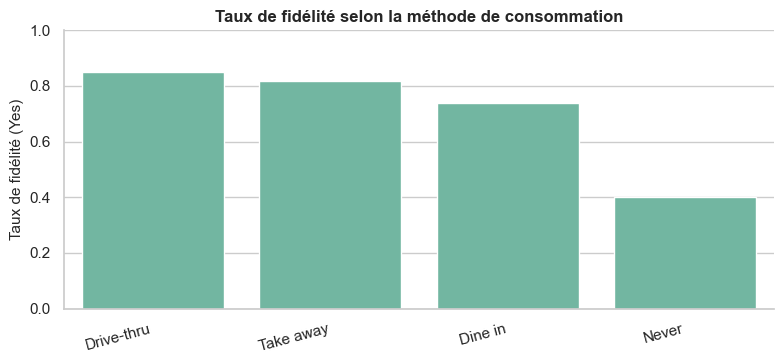

,purchaseMethod,n,loyalty_rate
1,Drive-thru,20,0.850000
4,Take away,49,0.816327
0,Dine in,46,0.739130
2,Never,5,0.400000


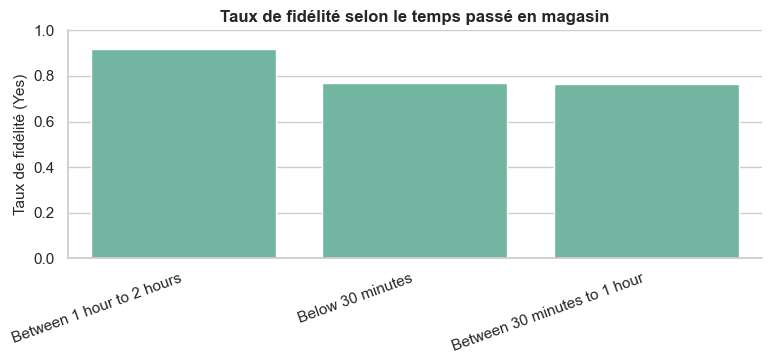

,timeSpent,n,loyalty_rate
1,Between 1 hour to 2 hours,12,0.916667
0,Below 30 minutes,73,0.767123
3,Between 30 minutes to 1 hour,34,0.764706


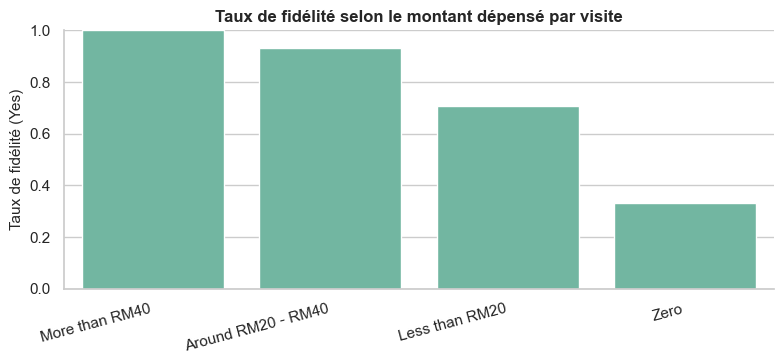

,moneySpend,n,loyalty_rate
2,More than RM40,7,1.000000
0,Around RM20 - RM40,45,0.933333
1,Less than RM20,58,0.706897
3,Zero,12,0.333333


In [193]:
loyalty_rate_plot(df, "visitFrequency", "Taux de fidélité selon la fréquence de visite", rotate=15)
loyalty_rate_plot(df, "purchaseMethod", "Taux de fidélité selon la méthode de consommation", rotate=15)
loyalty_rate_plot(df, "timeSpent", "Taux de fidélité selon le temps passé en magasin", rotate=20)
loyalty_rate_plot(df, "moneySpend", "Taux de fidélité selon le montant dépensé par visite", rotate=15)


**Observations :** 
- La fidélité augmente fortement avec la fréquence : les clients “Weekly/Monthly” ont un taux très élevé, tandis que “Never” est beaucoup plus bas. la fréquence de visite est un indicateur très fort de fidélité et d'ailleurs c'est cohérent avec une logique de rétention.
- Drive-thru et Take away ont des taux de fidélité plus élevés que Dine in et “Never” est le plus faible. Les méthodes rapides et pratiques semblent être associées à une meilleure continuité d’achat, peut-être parce qu'elles sont plus accessibles.
- Les clients restant 1–2h semblent plus fidèles, mais les écarts sont modérés.  
(certains groupes ont de petits effectifs). 
- La fidélité augmente clairement avec la dépense : les segments “RM20–RM40” et “>RM40” ont des taux très élevés, tandis que “Zero” est très faible, on peut donc l'associer à un engagement plus fort.  


In [194]:
rating_cols = ["rate_quality","rate_price","importance_promos","rate_ambiance","rate_wifi","rate_service","rate_hangout"]

df.groupby("loyalty")[rating_cols].mean().round(2)


,rate_quality,rate_price,importance_promos,rate_ambiance,rate_wifi,rate_service,rate_hangout
loyalty,,,,,,,
No,2.96,2.00,3.57,3.21,2.96,3.43,2.82
Yes,3.87,3.16,3.86,3.91,3.34,3.84,3.72


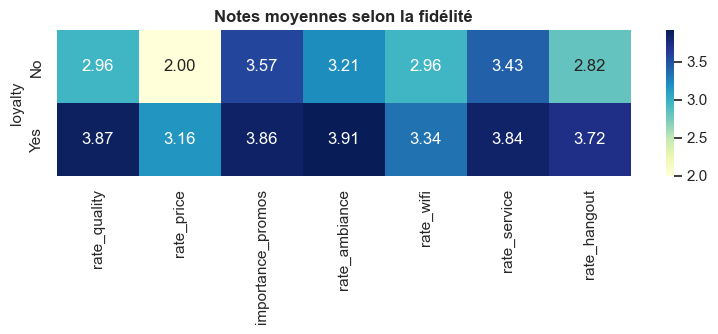

In [195]:
plt.figure(figsize=(8, 3.5))
sns.heatmap(df.groupby("loyalty")[rating_cols].mean(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Notes moyennes selon la fidélité", fontweight="bold")
plt.tight_layout()
plt.show()


**Observation :** les clients “Yes” donnent systématiquement de meilleures notes que les “No” sur toutes les dimensions (qualité, prix, ambiance, WiFi, service, hangout).  la perception globale (qualité + expérience en magasin + valeur/prix) est fortement associée à la fidélité déclarée.  
 l’écart sur la note de prix et la qualité est particulièrement marqué, ce qui suggère un levier “value for money”.


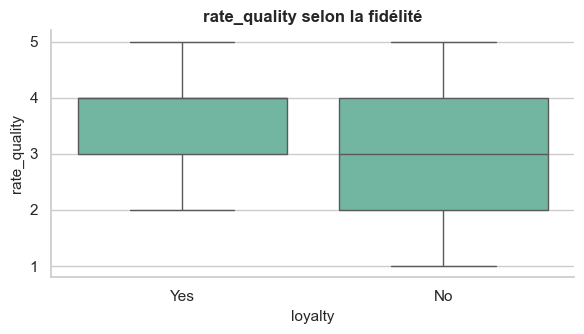

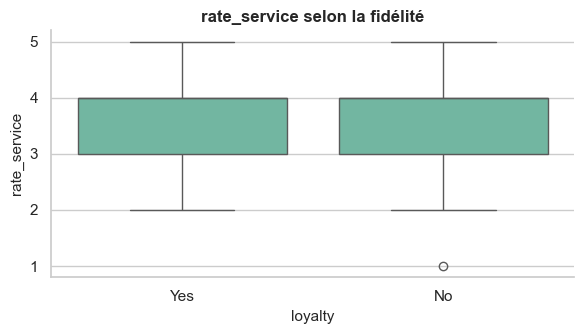

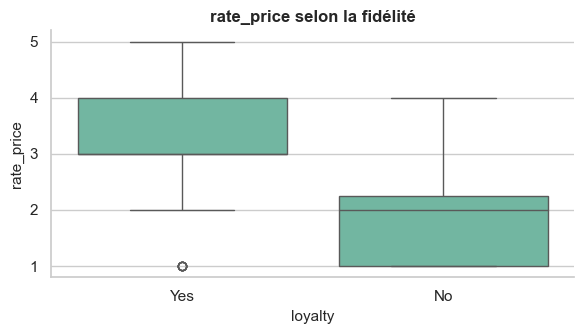

In [196]:
for col in ["rate_quality", "rate_service", "rate_price"]:
    plt.figure(figsize=(6, 3.5))
    sns.boxplot(data=df, x="loyalty", y=col)
    plt.title(f"{col} selon la fidélité", fontweight="bold")
    plt.tight_layout()
    plt.show()
